In [1]:
# leer archivo data/IPH_robos_2021_2024_tecmty.xlsx
import pandas as pd

df = pd.read_excel("data/IPH_robos_2021_2024_tecmty.xlsx")
df.head()

,FOLIO,FECHA,HORA,MINUTO,TIPO,VIOLENCIA,LATITUD,LONGITUD,DISTRITO,CUADRANTE
0,3196367,2024-01-01 00:00:00,99,99,ROBO A CASA HABITACION,NO,28.719604,-106.142035,Colón,12
1,3196186,2024-01-01 00:00:00,99,99,ROBO DE VEHICULO,NO,28.717739,-106.089196,Colón,15
2,3196158,2024-01-01 00:00:00,99,99,ROBO A CASA HABITACION,NO,28.646452,-106.057703,Ángel,35
3,3195958,2024-01-01 00:00:00,99,99,ROBO A NEGOCIO,NO,28.621036,-106.030771,Zapata,77
4,3195921,2024-01-01 00:00:00,99,99,ROBO DE VEHICULO,NO,28.602171,-105.992235,Morelos,57


In [2]:
df.isnull().sum()

FOLIO        0
FECHA        0
HORA         0
MINUTO       0
TIPO         0
VIOLENCIA    0
LATITUD      0
LONGITUD     0
DISTRITO     0
CUADRANTE    0
dtype: int64

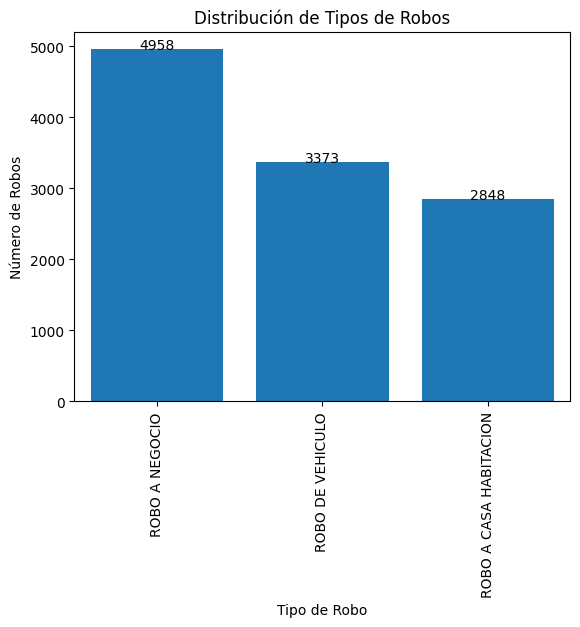

In [3]:
# visualizar distribución de tipos de robos
df['TIPO'].value_counts().plot(kind='bar', title='Distribución de Tipos de Robos')

# poner encima de cada barra el número de robos
import matplotlib.pyplot as plt

counts = df['TIPO'].value_counts()
plt.bar(counts.index, counts.values)
plt.title('Distribución de Tipos de Robos')
plt.xlabel('Tipo de Robo')
plt.ylabel('Número de Robos')
for i, v in enumerate(counts.values):
    plt.text(i, v + 5, str(v), ha='center')
plt.show()

In [6]:
# visualizar los valores unicos de las columnas
print('Los valores únicos para la columna HORA son:', df['HORA'].unique())
print('----------------------------------------------------------------')
print('Los valores únicos para la columna MINUTO son:', df['MINUTO'].unique())
print('----------------------------------------------------------------')
print('Los valores únicos para la columna TIPO son:', df['TIPO'].unique())
print('----------------------------------------------------------------')
print('Los valores únicos para la columna VIOLENCIA son:', df['VIOLENCIA'].unique())
print('----------------------------------------------------------------')
print('Los valores únicos para la columna DISTRITO son:', df['DISTRITO'].unique())
print('----------------------------------------------------------------')
print('Los valores únicos para la columna CUADRANTE son:', df['CUADRANTE'].unique())

Los valores únicos para la columna HORA son: [99  4  9 11 16 23  5  6  8 10 15 21  7 12 20 13 18  3 19  1  2 14 17 22
  0]
----------------------------------------------------------------
Los valores únicos para la columna MINUTO son: [99 34 31 35 33 55 47  0  4 18 23 15 41 32 10 27 30 43 52  8 13 44  5  2
 20 38  7 36 25 48 50 56 39 45  1 12 40 22 37 57 19  3 21 14 51 59 54 58
 29 42 24 16 26  9 28 11 17 53  6 46 49]
----------------------------------------------------------------
Los valores únicos para la columna TIPO son: ['ROBO A CASA HABITACION' 'ROBO DE VEHICULO' 'ROBO A NEGOCIO']
----------------------------------------------------------------
Los valores únicos para la columna VIOLENCIA son: ['NO' 'SI']
----------------------------------------------------------------
Los valores únicos para la columna DISTRITO son: ['Colón' 'Ángel' 'Zapata' 'Morelos' 'Villa' 'Diana']
----------------------------------------------------------------
Los valores únicos para la columna CUADRANTE s

In [8]:
# ver si hay duplicados en las columna de FOLIO, LATITUD y LONGITUD
print('La cantidad de datos duplicados en la columna FOLIO es:', df['FOLIO'].duplicated().sum())
print('----------------------------------------------------------------')
print('La cantidad de datos duplicados en la columna LATITUD es:', df['LATITUD'].duplicated().sum())
print('----------------------------------------------------------------')
print('La cantidad de datos duplicados en la columna LONGITUD es:', df['LONGITUD'].duplicated().sum())


La cantidad de datos duplicados en la columna FOLIO es: 716
----------------------------------------------------------------
La cantidad de datos duplicados en la columna LATITUD es: 938
----------------------------------------------------------------
La cantidad de datos duplicados en la columna LONGITUD es: 929


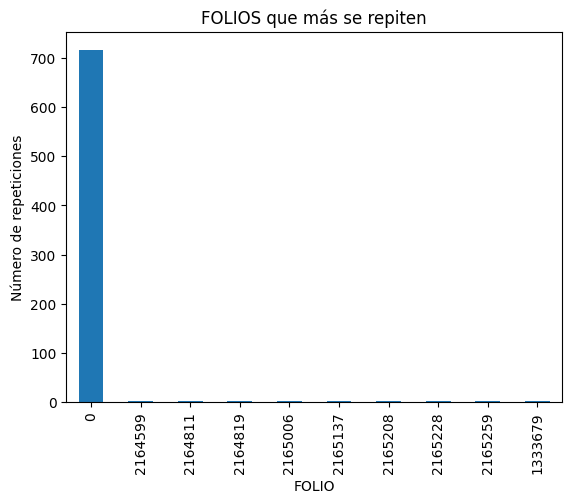

In [9]:
# visualizar el datos en FOLIO que mas se repite
df['FOLIO'].value_counts().head(10).plot(kind='bar', title='FOLIOS que más se repiten')
plt.xlabel('FOLIO')
plt.ylabel('Número de repeticiones')
plt.show()

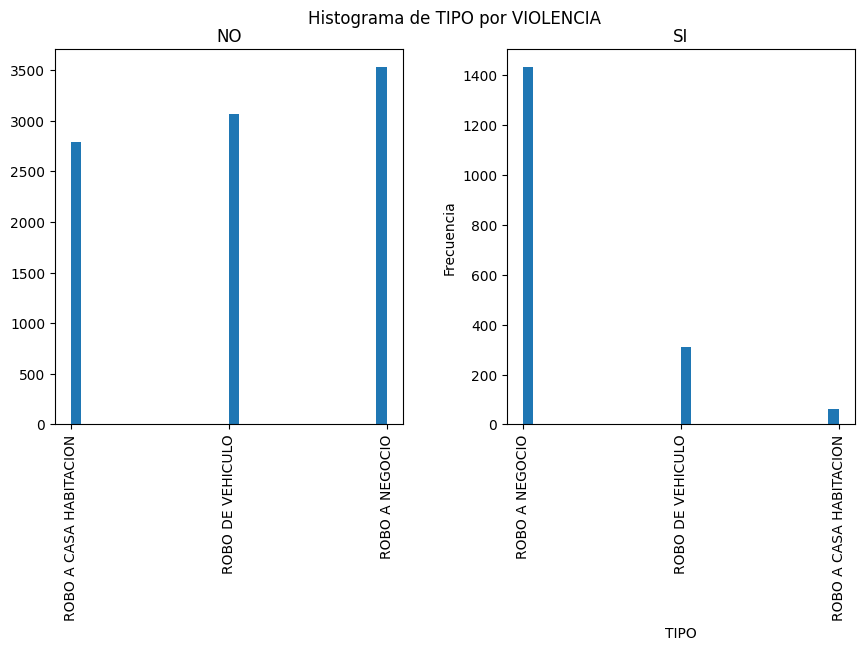

In [10]:
# realizar un histograma de la columna TIPO, en la y poner la variable de VIOLENCIA
df.hist(column='TIPO', by='VIOLENCIA', bins=30, figsize=(10, 5))
plt.suptitle('Histograma de TIPO por VIOLENCIA')
plt.xlabel('TIPO')
plt.ylabel('Frecuencia')
plt.show()

In [11]:
# ver que tipo de dato es FECHA
print('El tipo de dato de la columna FECHA es:', df['FECHA'].dtype)

El tipo de dato de la columna FECHA es: object


In [12]:
# visualizar si hay datos nulos en la columna FECHA
df.FECHA.value_counts()

FECHA
<Null>                 1197
2021-02-02 00:00:00      20
2021-03-29 00:00:00      19
2023-01-31 00:00:00      19
2021-11-01 00:00:00      18
                       ... 
2024-06-22 00:00:00       1
2022-06-14 00:00:00       1
2022-07-20 00:00:00       1
2022-01-02 00:00:00       1
2022-01-05 00:00:00       1
Name: count, Length: 1298, dtype: int64

In [13]:
# convertir la columna FECHA a tipo datetime, forzando errores a NaT
df['FECHA'] = pd.to_datetime(df['FECHA'], errors='coerce')
df['FECHA'].dtype

dtype('<M8[ns]')

In [14]:
df.isnull().sum()

FOLIO           0
FECHA        1197
HORA            0
MINUTO          0
TIPO            0
VIOLENCIA       0
LATITUD         0
LONGITUD        0
DISTRITO        0
CUADRANTE       0
dtype: int64

In [15]:
# mostrar renglones donde FECHA es nulo
df[df['FECHA'].isnull()]

,FOLIO,FECHA,HORA,MINUTO,TIPO,VIOLENCIA,LATITUD,LONGITUD,DISTRITO,CUADRANTE
3444,2756603,NaT,1,2,ROBO DE VEHICULO,NO,28.650632,-106.058686,Ángel,35
3445,2756723,NaT,6,50,ROBO DE VEHICULO,NO,28.618501,-106.060972,Zapata,75
3446,2756766,NaT,8,45,ROBO A NEGOCIO,NO,28.642651,-106.073942,Ángel,36
3447,2756801,NaT,10,7,ROBO A CASA HABITACION,NO,28.652415,-106.080928,Villa,25
3448,2756820,NaT,10,51,ROBO A NEGOCIO,NO,28.618660,-106.066088,Zapata,75
...,...,...,...,...,...,...,...,...,...,...
10882,1652033,NaT,23,53,ROBO A NEGOCIO,NO,28.729168,-106.113141,Colón,13
10883,1651146,NaT,9,7,ROBO A NEGOCIO,NO,28.734838,-106.131418,Colón,7
10884,1651067,NaT,5,41,ROBO DE VEHICULO,NO,28.676933,-106.004125,Morelos,46
10885,1651099,NaT,7,44,ROBO DE VEHICULO,NO,28.597629,-106.020398,Morelos,55


In [16]:
# crear la columna mes y año a partir de la columna FECHA, sin tomar en cuenta los datos nulos
df['MES'] = df['FECHA'].dt.month
df['AÑO'] = df['FECHA'].dt.year
df[['FECHA', 'MES', 'AÑO']].head(10)

,FECHA,MES,AÑO
0,2024-01-01,1.0,2024.0
1,2024-01-01,1.0,2024.0
2,2024-01-01,1.0,2024.0
3,2024-01-01,1.0,2024.0
4,2024-01-01,1.0,2024.0
5,2024-01-01,1.0,2024.0
6,2024-01-01,1.0,2024.0
7,2024-01-01,1.0,2024.0
8,2024-01-01,1.0,2024.0
9,2024-01-01,1.0,2024.0


In [17]:
# ver renglones donde fecha es nulo
df[df['FECHA'].isnull()]

,FOLIO,FECHA,HORA,MINUTO,TIPO,VIOLENCIA,LATITUD,LONGITUD,DISTRITO,CUADRANTE,MES,AÑO
3444,2756603,NaT,1,2,ROBO DE VEHICULO,NO,28.650632,-106.058686,Ángel,35,NaN,NaN
3445,2756723,NaT,6,50,ROBO DE VEHICULO,NO,28.618501,-106.060972,Zapata,75,NaN,NaN
3446,2756766,NaT,8,45,ROBO A NEGOCIO,NO,28.642651,-106.073942,Ángel,36,NaN,NaN
3447,2756801,NaT,10,7,ROBO A CASA HABITACION,NO,28.652415,-106.080928,Villa,25,NaN,NaN
3448,2756820,NaT,10,51,ROBO A NEGOCIO,NO,28.618660,-106.066088,Zapata,75,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
10882,1652033,NaT,23,53,ROBO A NEGOCIO,NO,28.729168,-106.113141,Colón,13,NaN,NaN
10883,1651146,NaT,9,7,ROBO A NEGOCIO,NO,28.734838,-106.131418,Colón,7,NaN,NaN
10884,1651067,NaT,5,41,ROBO DE VEHICULO,NO,28.676933,-106.004125,Morelos,46,NaN,NaN
10885,1651099,NaT,7,44,ROBO DE VEHICULO,NO,28.597629,-106.020398,Morelos,55,NaN,NaN


In [18]:
# creamos columna trimestre, tomando en cuenta los datos nulos
df['TRIMESTRE'] = df['FECHA'].dt.quarter

#creamos columna semestre, tomando en cuenta los datos nulos
df['SEMESTRE'] = df['FECHA'].dt.month.apply(lambda x: 1 if x <= 6 else 2 if pd.notnull(x) else None)

#creamos columna estación del año, tomando en cuenta los datos nulos
def estacion_del_año(mes):
    if pd.isnull(mes):
        return None
    elif mes in [12, 1, 2]:
        return 'Invierno'
    elif mes in [3, 4, 5]:
        return 'Primavera'
    elif mes in [6, 7, 8]:
        return 'Verano'
    elif mes in [9, 10, 11]:
        return 'Otoño'

df['ESTACION'] = df['FECHA'].dt.month.apply(estacion_del_año)
df.head()

,FOLIO,FECHA,HORA,MINUTO,TIPO,VIOLENCIA,LATITUD,LONGITUD,DISTRITO,CUADRANTE,MES,AÑO,TRIMESTRE,SEMESTRE,ESTACION
0,3196367,2024-01-01,99,99,ROBO A CASA HABITACION,NO,28.719604,-106.142035,Colón,12,1.0,2024.0,1.0,1.0,Invierno
1,3196186,2024-01-01,99,99,ROBO DE VEHICULO,NO,28.717739,-106.089196,Colón,15,1.0,2024.0,1.0,1.0,Invierno
2,3196158,2024-01-01,99,99,ROBO A CASA HABITACION,NO,28.646452,-106.057703,Ángel,35,1.0,2024.0,1.0,1.0,Invierno
3,3195958,2024-01-01,99,99,ROBO A NEGOCIO,NO,28.621036,-106.030771,Zapata,77,1.0,2024.0,1.0,1.0,Invierno
4,3195921,2024-01-01,99,99,ROBO DE VEHICULO,NO,28.602171,-105.992235,Morelos,57,1.0,2024.0,1.0,1.0,Invierno


In [19]:
# ver renglones donde estación es nulo
df[df['ESTACION'].isnull()]

,FOLIO,FECHA,HORA,MINUTO,TIPO,VIOLENCIA,LATITUD,LONGITUD,DISTRITO,CUADRANTE,MES,AÑO,TRIMESTRE,SEMESTRE,ESTACION
3444,2756603,NaT,1,2,ROBO DE VEHICULO,NO,28.650632,-106.058686,Ángel,35,NaN,NaN,NaN,NaN,None
3445,2756723,NaT,6,50,ROBO DE VEHICULO,NO,28.618501,-106.060972,Zapata,75,NaN,NaN,NaN,NaN,None
3446,2756766,NaT,8,45,ROBO A NEGOCIO,NO,28.642651,-106.073942,Ángel,36,NaN,NaN,NaN,NaN,None
3447,2756801,NaT,10,7,ROBO A CASA HABITACION,NO,28.652415,-106.080928,Villa,25,NaN,NaN,NaN,NaN,None
3448,2756820,NaT,10,51,ROBO A NEGOCIO,NO,28.618660,-106.066088,Zapata,75,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10882,1652033,NaT,23,53,ROBO A NEGOCIO,NO,28.729168,-106.113141,Colón,13,NaN,NaN,NaN,NaN,None
10883,1651146,NaT,9,7,ROBO A NEGOCIO,NO,28.734838,-106.131418,Colón,7,NaN,NaN,NaN,NaN,None
10884,1651067,NaT,5,41,ROBO DE VEHICULO,NO,28.676933,-106.004125,Morelos,46,NaN,NaN,NaN,NaN,None
10885,1651099,NaT,7,44,ROBO DE VEHICULO,NO,28.597629,-106.020398,Morelos,55,NaN,NaN,NaN,NaN,None


In [20]:
# agregar variable de dia de la semana, donde 0 es lunes y 6 es domingo, tomando en cuenta los datos nulos
df['DIA'] = df['FECHA'].dt.dayofweek
df.head()

,FOLIO,FECHA,HORA,MINUTO,TIPO,VIOLENCIA,LATITUD,LONGITUD,DISTRITO,CUADRANTE,MES,AÑO,TRIMESTRE,SEMESTRE,ESTACION,DIA
0,3196367,2024-01-01,99,99,ROBO A CASA HABITACION,NO,28.719604,-106.142035,Colón,12,1.0,2024.0,1.0,1.0,Invierno,0.0
1,3196186,2024-01-01,99,99,ROBO DE VEHICULO,NO,28.717739,-106.089196,Colón,15,1.0,2024.0,1.0,1.0,Invierno,0.0
2,3196158,2024-01-01,99,99,ROBO A CASA HABITACION,NO,28.646452,-106.057703,Ángel,35,1.0,2024.0,1.0,1.0,Invierno,0.0
3,3195958,2024-01-01,99,99,ROBO A NEGOCIO,NO,28.621036,-106.030771,Zapata,77,1.0,2024.0,1.0,1.0,Invierno,0.0
4,3195921,2024-01-01,99,99,ROBO DE VEHICULO,NO,28.602171,-105.992235,Morelos,57,1.0,2024.0,1.0,1.0,Invierno,0.0


In [24]:
# crear columna franja horaria, teniendo en cuenta que hay horas con valor de 99 (nulo)
def franja_horaria(hora):
    if hora == 99:
        return None
    elif 0 <= hora < 6:
        return 'Madrugada'
    elif 6 <= hora < 12:
        return 'Mañana'
    elif 12 <= hora < 18:
        return 'Tarde'
    elif 18 <= hora < 24:
        return 'Noche'
    else:
        return 'Desconocido'

df['FRANJA HORARIA'] = df['HORA'].apply(franja_horaria)
df.head()

,FOLIO,FECHA,HORA,MINUTO,TIPO,VIOLENCIA,LATITUD,LONGITUD,DISTRITO,CUADRANTE,MES,AÑO,TRIMESTRE,SEMESTRE,ESTACION,DIA,FRANJA HORARIA
0,3196367,2024-01-01,99,99,ROBO A CASA HABITACION,NO,28.719604,-106.142035,Colón,12,1.0,2024.0,1.0,1.0,Invierno,0.0,None
1,3196186,2024-01-01,99,99,ROBO DE VEHICULO,NO,28.717739,-106.089196,Colón,15,1.0,2024.0,1.0,1.0,Invierno,0.0,None
2,3196158,2024-01-01,99,99,ROBO A CASA HABITACION,NO,28.646452,-106.057703,Ángel,35,1.0,2024.0,1.0,1.0,Invierno,0.0,None
3,3195958,2024-01-01,99,99,ROBO A NEGOCIO,NO,28.621036,-106.030771,Zapata,77,1.0,2024.0,1.0,1.0,Invierno,0.0,None
4,3195921,2024-01-01,99,99,ROBO DE VEHICULO,NO,28.602171,-105.992235,Morelos,57,1.0,2024.0,1.0,1.0,Invierno,0.0,None


In [25]:
# revisar los renglones donde la hora es de 18 a 23
df[df['HORA'].between(18, 23)]

,FOLIO,FECHA,HORA,MINUTO,TIPO,VIOLENCIA,LATITUD,LONGITUD,DISTRITO,CUADRANTE,MES,AÑO,TRIMESTRE,SEMESTRE,ESTACION,DIA,FRANJA HORARIA
489,32938,2024-03-01,23,55,ROBO DE VEHICULO,NO,28.597802,-106.083305,Zapata,78,3.0,2024.0,1.0,1.0,Primavera,4.0,Noche
495,32148,2024-03-02,21,23,ROBO A NEGOCIO,SI,28.592840,-106.022664,Morelos,60,3.0,2024.0,1.0,1.0,Primavera,5.0,Noche
500,32291,2024-03-03,20,10,ROBO A NEGOCIO,SI,28.621291,-106.080732,Zapata,69,3.0,2024.0,1.0,1.0,Primavera,6.0,Noche
501,32399,2024-03-03,20,27,ROBO A NEGOCIO,SI,28.728080,-106.104949,Colón,14,3.0,2024.0,1.0,1.0,Primavera,6.0,Noche
502,32174,2024-03-03,21,23,ROBO DE VEHICULO,NO,28.609748,-106.092065,Zapata,68,3.0,2024.0,1.0,1.0,Primavera,6.0,Noche
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11170,1592053,2021-10-30,20,35,ROBO A NEGOCIO,SI,28.684953,-106.130595,Villa,16,10.0,2021.0,4.0,2.0,Otoño,5.0,Noche
11171,1592180,2021-10-30,22,49,ROBO DE VEHICULO,NO,28.605584,-106.048385,Zapata,76,10.0,2021.0,4.0,2.0,Otoño,5.0,Noche
11176,1593119,2021-10-31,19,6,ROBO A CASA HABITACION,NO,28.665730,-105.951961,Morelos,48,10.0,2021.0,4.0,2.0,Otoño,6.0,Noche
11177,1593290,2021-10-31,21,11,ROBO DE VEHICULO,SI,28.732516,-106.109992,Colón,9,10.0,2021.0,4.0,2.0,Otoño,6.0,Noche


In [26]:
# visualizar renglones donde franja horaria es desconocido
df[df['FRANJA HORARIA'] == 'Desconocido']

,FOLIO,FECHA,HORA,MINUTO,TIPO,VIOLENCIA,LATITUD,LONGITUD,DISTRITO,CUADRANTE,MES,AÑO,TRIMESTRE,SEMESTRE,ESTACION,DIA,FRANJA HORARIA


In [27]:
# crear columna de VIOLENCIA_BIN donde si es con violencia es 1 y sin violencia es 0
df['VIOLENCIA_BIN'] = df['VIOLENCIA'].apply(lambda x: 1 if x == 'SI' else 0)
df.head()

,FOLIO,FECHA,HORA,MINUTO,TIPO,VIOLENCIA,LATITUD,LONGITUD,DISTRITO,CUADRANTE,MES,AÑO,TRIMESTRE,SEMESTRE,ESTACION,DIA,FRANJA HORARIA,VIOLENCIA_BIN
0,3196367,2024-01-01,99,99,ROBO A CASA HABITACION,NO,28.719604,-106.142035,Colón,12,1.0,2024.0,1.0,1.0,Invierno,0.0,None,0
1,3196186,2024-01-01,99,99,ROBO DE VEHICULO,NO,28.717739,-106.089196,Colón,15,1.0,2024.0,1.0,1.0,Invierno,0.0,None,0
2,3196158,2024-01-01,99,99,ROBO A CASA HABITACION,NO,28.646452,-106.057703,Ángel,35,1.0,2024.0,1.0,1.0,Invierno,0.0,None,0
3,3195958,2024-01-01,99,99,ROBO A NEGOCIO,NO,28.621036,-106.030771,Zapata,77,1.0,2024.0,1.0,1.0,Invierno,0.0,None,0
4,3195921,2024-01-01,99,99,ROBO DE VEHICULO,NO,28.602171,-105.992235,Morelos,57,1.0,2024.0,1.0,1.0,Invierno,0.0,None,0


In [28]:
# crear columna ROBO A NEGOCIO donde si el TIPO es 'ROBO A NEGOCIO' es 1 y si no es 0
df['ROBO A NEGOCIO'] = df['TIPO'].apply(lambda x: 1 if x == 'ROBO A NEGOCIO' else 0)
df.head()

,FOLIO,FECHA,HORA,MINUTO,TIPO,VIOLENCIA,LATITUD,LONGITUD,DISTRITO,CUADRANTE,MES,AÑO,TRIMESTRE,SEMESTRE,ESTACION,DIA,FRANJA HORARIA,VIOLENCIA_BIN,ROBO A NEGOCIO
0,3196367,2024-01-01,99,99,ROBO A CASA HABITACION,NO,28.719604,-106.142035,Colón,12,1.0,2024.0,1.0,1.0,Invierno,0.0,None,0,0
1,3196186,2024-01-01,99,99,ROBO DE VEHICULO,NO,28.717739,-106.089196,Colón,15,1.0,2024.0,1.0,1.0,Invierno,0.0,None,0,0
2,3196158,2024-01-01,99,99,ROBO A CASA HABITACION,NO,28.646452,-106.057703,Ángel,35,1.0,2024.0,1.0,1.0,Invierno,0.0,None,0,0
3,3195958,2024-01-01,99,99,ROBO A NEGOCIO,NO,28.621036,-106.030771,Zapata,77,1.0,2024.0,1.0,1.0,Invierno,0.0,None,0,1
4,3195921,2024-01-01,99,99,ROBO DE VEHICULO,NO,28.602171,-105.992235,Morelos,57,1.0,2024.0,1.0,1.0,Invierno,0.0,None,0,0


In [29]:
# crear columna ROBO A CASA HABITACION donde si el TIPO es 'ROBO A CASA HABITACION' es 1 y si no es 0
df['ROBO A CASA HABITACION'] = df['TIPO'].apply(lambda x: 1 if x == 'ROBO A CASA HABITACION' else 0)
df.head()

,FOLIO,FECHA,HORA,MINUTO,TIPO,VIOLENCIA,LATITUD,LONGITUD,DISTRITO,CUADRANTE,MES,AÑO,TRIMESTRE,SEMESTRE,ESTACION,DIA,FRANJA HORARIA,VIOLENCIA_BIN,ROBO A NEGOCIO,ROBO A CASA HABITACION
0,3196367,2024-01-01,99,99,ROBO A CASA HABITACION,NO,28.719604,-106.142035,Colón,12,1.0,2024.0,1.0,1.0,Invierno,0.0,None,0,0,1
1,3196186,2024-01-01,99,99,ROBO DE VEHICULO,NO,28.717739,-106.089196,Colón,15,1.0,2024.0,1.0,1.0,Invierno,0.0,None,0,0,0
2,3196158,2024-01-01,99,99,ROBO A CASA HABITACION,NO,28.646452,-106.057703,Ángel,35,1.0,2024.0,1.0,1.0,Invierno,0.0,None,0,0,1
3,3195958,2024-01-01,99,99,ROBO A NEGOCIO,NO,28.621036,-106.030771,Zapata,77,1.0,2024.0,1.0,1.0,Invierno,0.0,None,0,1,0
4,3195921,2024-01-01,99,99,ROBO DE VEHICULO,NO,28.602171,-105.992235,Morelos,57,1.0,2024.0,1.0,1.0,Invierno,0.0,None,0,0,0


In [30]:
# crear columna ROBO DE VEHICULO donde si el TIPO es 'ROBO DE VEHICULO' es 1 y si no es 0
df['ROBO DE VEHICULO'] = df['TIPO'].apply(lambda x: 1 if x == 'ROBO DE VEHICULO' else 0)
df.head()

,FOLIO,FECHA,HORA,MINUTO,TIPO,VIOLENCIA,LATITUD,LONGITUD,DISTRITO,CUADRANTE,...,AÑO,TRIMESTRE,SEMESTRE,ESTACION,DIA,FRANJA HORARIA,VIOLENCIA_BIN,ROBO A NEGOCIO,ROBO A CASA HABITACION,ROBO DE VEHICULO
0,3196367,2024-01-01,99,99,ROBO A CASA HABITACION,NO,28.719604,-106.142035,Colón,12,...,2024.0,1.0,1.0,Invierno,0.0,None,0,0,1,0
1,3196186,2024-01-01,99,99,ROBO DE VEHICULO,NO,28.717739,-106.089196,Colón,15,...,2024.0,1.0,1.0,Invierno,0.0,None,0,0,0,1
2,3196158,2024-01-01,99,99,ROBO A CASA HABITACION,NO,28.646452,-106.057703,Ángel,35,...,2024.0,1.0,1.0,Invierno,0.0,None,0,0,1,0
3,3195958,2024-01-01,99,99,ROBO A NEGOCIO,NO,28.621036,-106.030771,Zapata,77,...,2024.0,1.0,1.0,Invierno,0.0,None,0,1,0,0
4,3195921,2024-01-01,99,99,ROBO DE VEHICULO,NO,28.602171,-105.992235,Morelos,57,...,2024.0,1.0,1.0,Invierno,0.0,None,0,0,0,1


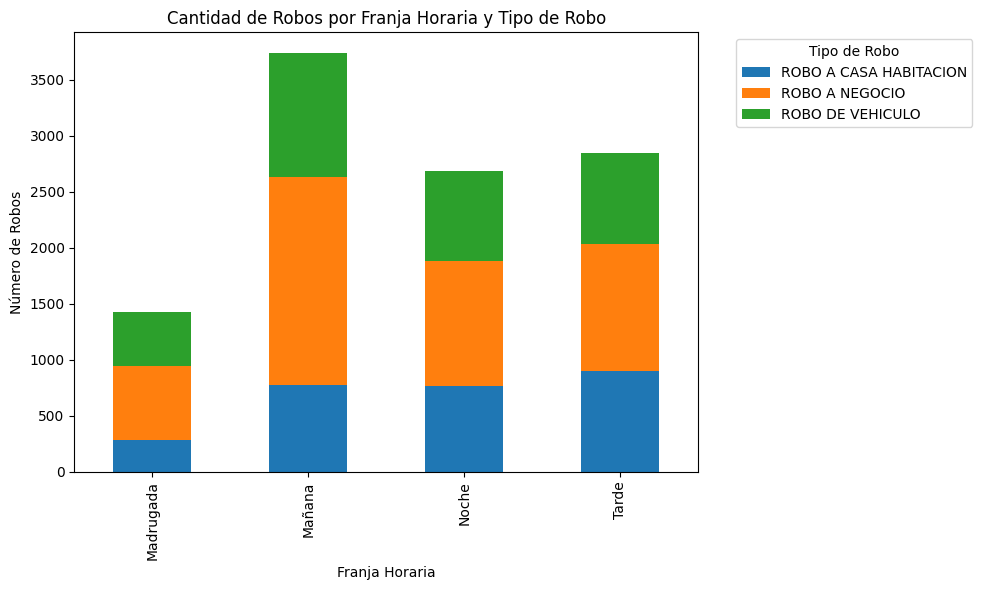

In [31]:
# revisar cantidad de robos por franja horaria y tipo de robo
df.groupby(['FRANJA HORARIA', 'TIPO']).size().unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Cantidad de Robos por Franja Horaria y Tipo de Robo')
plt.xlabel('Franja Horaria')
plt.ylabel('Número de Robos')
plt.legend(title='Tipo de Robo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

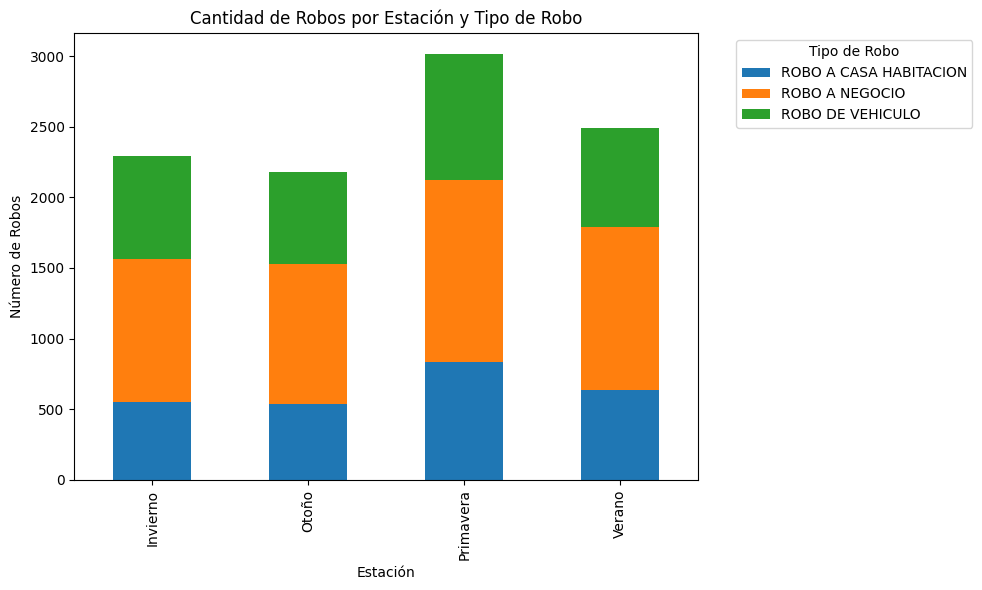

In [32]:
#revisar cantidad de robos por estacion y tipo de robo
df.groupby(['ESTACION', 'TIPO']).size().unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Cantidad de Robos por Estación y Tipo de Robo')
plt.xlabel('Estación')
plt.ylabel('Número de Robos')
plt.legend(title='Tipo de Robo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

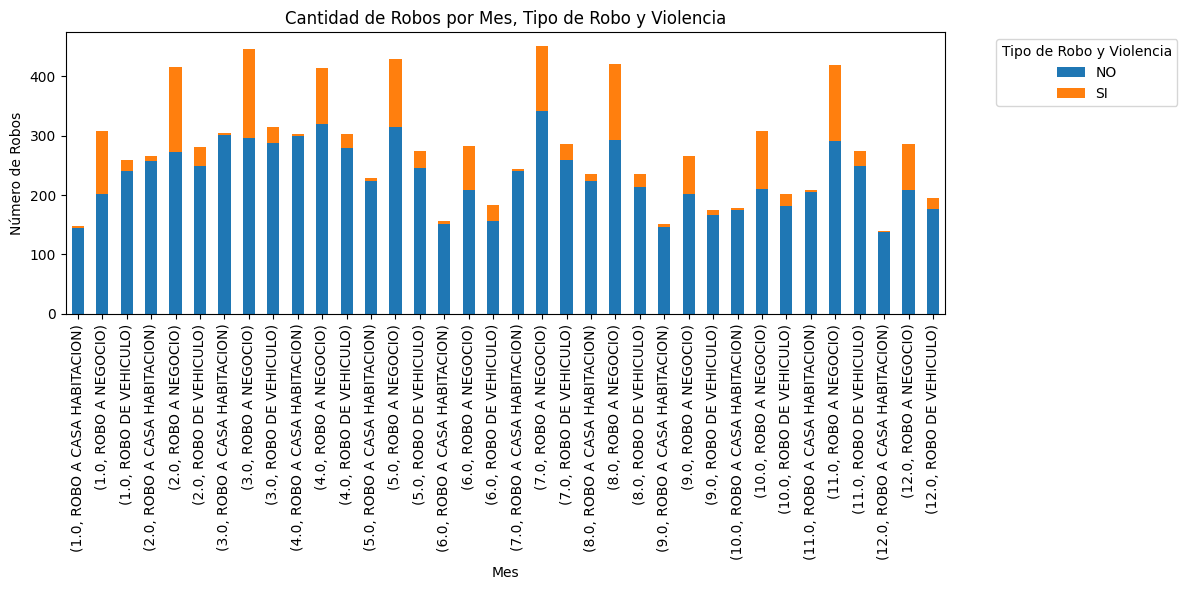

In [33]:
# revisar cantidad de robos por mes y tipo de robo, con violencia y sin violencia
df.groupby(['MES', 'TIPO', 'VIOLENCIA']).size().unstack().plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Cantidad de Robos por Mes, Tipo de Robo y Violencia')
plt.xlabel('Mes')
plt.ylabel('Número de Robos')
plt.legend(title='Tipo de Robo y Violencia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [34]:
# mostrar renglones donde fecha es nulo
df[df['FECHA'].isnull()]

,FOLIO,FECHA,HORA,MINUTO,TIPO,VIOLENCIA,LATITUD,LONGITUD,DISTRITO,CUADRANTE,...,AÑO,TRIMESTRE,SEMESTRE,ESTACION,DIA,FRANJA HORARIA,VIOLENCIA_BIN,ROBO A NEGOCIO,ROBO A CASA HABITACION,ROBO DE VEHICULO
3444,2756603,NaT,1,2,ROBO DE VEHICULO,NO,28.650632,-106.058686,Ángel,35,...,NaN,NaN,NaN,None,NaN,Madrugada,0,0,0,1
3445,2756723,NaT,6,50,ROBO DE VEHICULO,NO,28.618501,-106.060972,Zapata,75,...,NaN,NaN,NaN,None,NaN,Mañana,0,0,0,1
3446,2756766,NaT,8,45,ROBO A NEGOCIO,NO,28.642651,-106.073942,Ángel,36,...,NaN,NaN,NaN,None,NaN,Mañana,0,1,0,0
3447,2756801,NaT,10,7,ROBO A CASA HABITACION,NO,28.652415,-106.080928,Villa,25,...,NaN,NaN,NaN,None,NaN,Mañana,0,0,1,0
3448,2756820,NaT,10,51,ROBO A NEGOCIO,NO,28.618660,-106.066088,Zapata,75,...,NaN,NaN,NaN,None,NaN,Mañana,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10882,1652033,NaT,23,53,ROBO A NEGOCIO,NO,28.729168,-106.113141,Colón,13,...,NaN,NaN,NaN,None,NaN,Noche,0,1,0,0
10883,1651146,NaT,9,7,ROBO A NEGOCIO,NO,28.734838,-106.131418,Colón,7,...,NaN,NaN,NaN,None,NaN,Mañana,0,1,0,0
10884,1651067,NaT,5,41,ROBO DE VEHICULO,NO,28.676933,-106.004125,Morelos,46,...,NaN,NaN,NaN,None,NaN,Madrugada,0,0,0,1
10885,1651099,NaT,7,44,ROBO DE VEHICULO,NO,28.597629,-106.020398,Morelos,55,...,NaN,NaN,NaN,None,NaN,Mañana,0,0,0,1


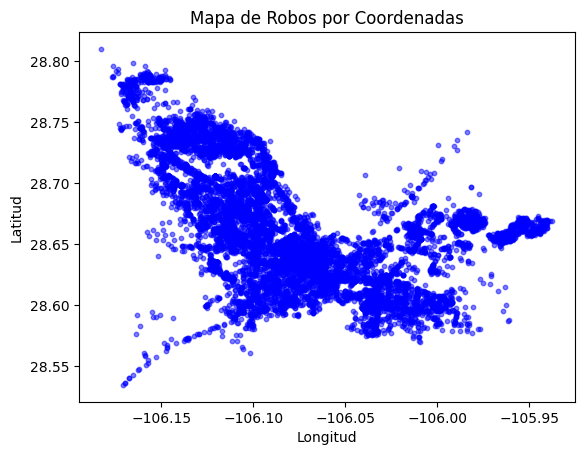

In [35]:
# tomando en cuenta las coordenadas (longitud y latitud), los cuadrantes y los tipos de robos, visualizar en un scatter plot los robos en un mapa
plt.scatter(df['LONGITUD'], df['LATITUD'], c='blue', alpha=0.5, s=10)
plt.title('Mapa de Robos por Coordenadas')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

In [36]:
# en un mapa de calor, determina las zonas con mayor concentración de robos en la ciudad de chihuahua, con folium, latitud y longitud
import folium
from folium.plugins import HeatMap

# Crear un mapa base
mapa = folium.Map(location=[28.6325, -106.0691], zoom_start=12)

# Preparar los datos para el mapa de calor
datos_calor = df[['LATITUD', 'LONGITUD']].dropna().values.tolist()

# Añadir el mapa de calor
HeatMap(datos_calor, radius=15).add_to(mapa)

# Mostrar el mapa
mapa